In [1]:
import scanpy as sc
sc.set_figure_params()

In [8]:
import pandas as pd
adata=sc.AnnData(pd.read_table("GSM3408139_Uninj_Sciatic_Mesenchymal.txt.gz",index_col=0).T)

In [9]:
import scipy.sparse as sp
adata.X=sp.csr_matrix(adata.X)

In [10]:
adata.X

<880x17907 sparse matrix of type '<class 'numpy.float32'>'
	with 969446 stored elements in Compressed Sparse Row format>

In [11]:
adata_s=sc.read("UninjMesenchymal_seur.h5ad")

In [14]:
adata_s.obs

,total_counts,total_features
Uninj_TTTAGTGACAAG,2807.671132,2559.0
Uninj_ACAATCTAATCC,2960.634106,2826.0
Uninj_CGACCCCTATAA,2664.727136,2504.0
Uninj_GACTAAAATGTA,2777.683470,2704.0
Uninj_ACTTCCCACCGA,2883.825299,2450.0
...,...,...
Uninj_TCGCACTGGCGC,1482.204850,454.0
Uninj_GCCGTAACTTGA,1768.784441,661.0
Uninj_CATAGGTCCTGT,1429.119191,403.0
Uninj_CGGTTCTAGAGT,1158.443446,261.0


In [15]:
adata_s.obs_names=[n[1] for n in adata_s.obs_names.str.split("_")]

In [16]:
adata=adata[adata_s.obs_names]

In [18]:
import scFates as scf

In [19]:
sc.pp.filter_genes(adata,min_cells=3)

In [20]:
sc.pp.normalize_total(adata,target_sum=1e3)
sc.pp.log1p(adata)

Finding overdispersed features
    computing mean and variances
    gam fitting
    found 94 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



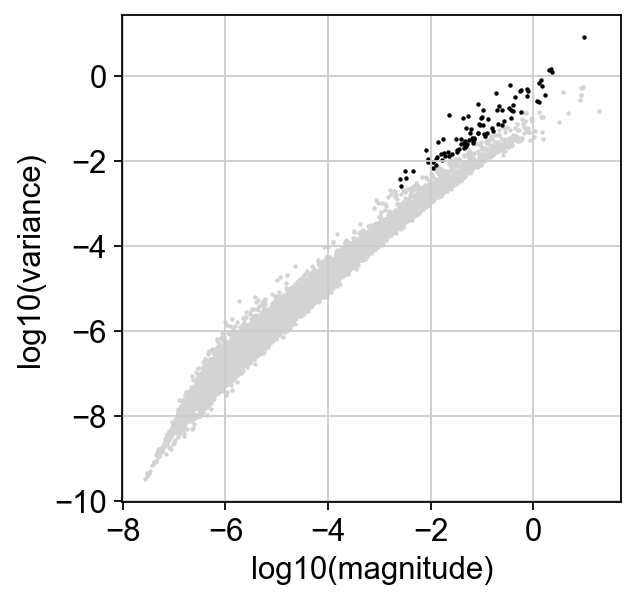

In [21]:
scf.pp.find_overdispersed(adata,plot=True)

In [22]:
adata.raw=adata

In [23]:
adata[:,adata.var.highly_variable]
sc.pp.scale(adata)
sc.pp.pca(adata)

In [24]:
sc.pp.neighbors(adata,n_pcs=10)

In [25]:
sc.tl.umap(adata)

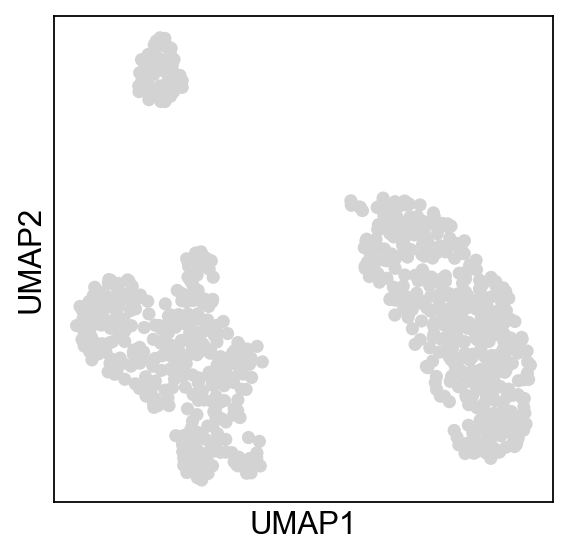

In [26]:
sc.pl.umap(adata)

In [29]:
sc.tl.leiden(adata,resolution=.1)

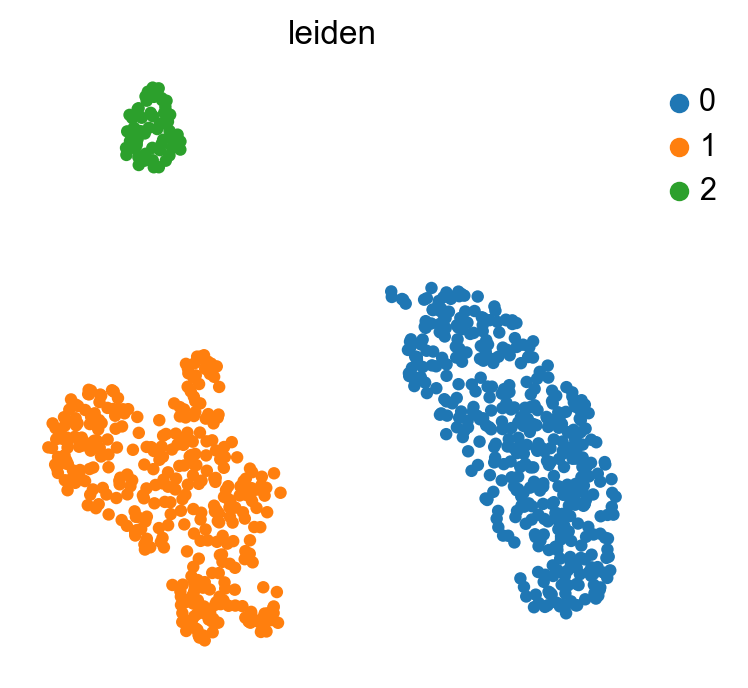

In [31]:
import scvelo as scv
scv.set_figure_params(figsize=(4,4))
scv.pl.umap(adata,color="leiden")

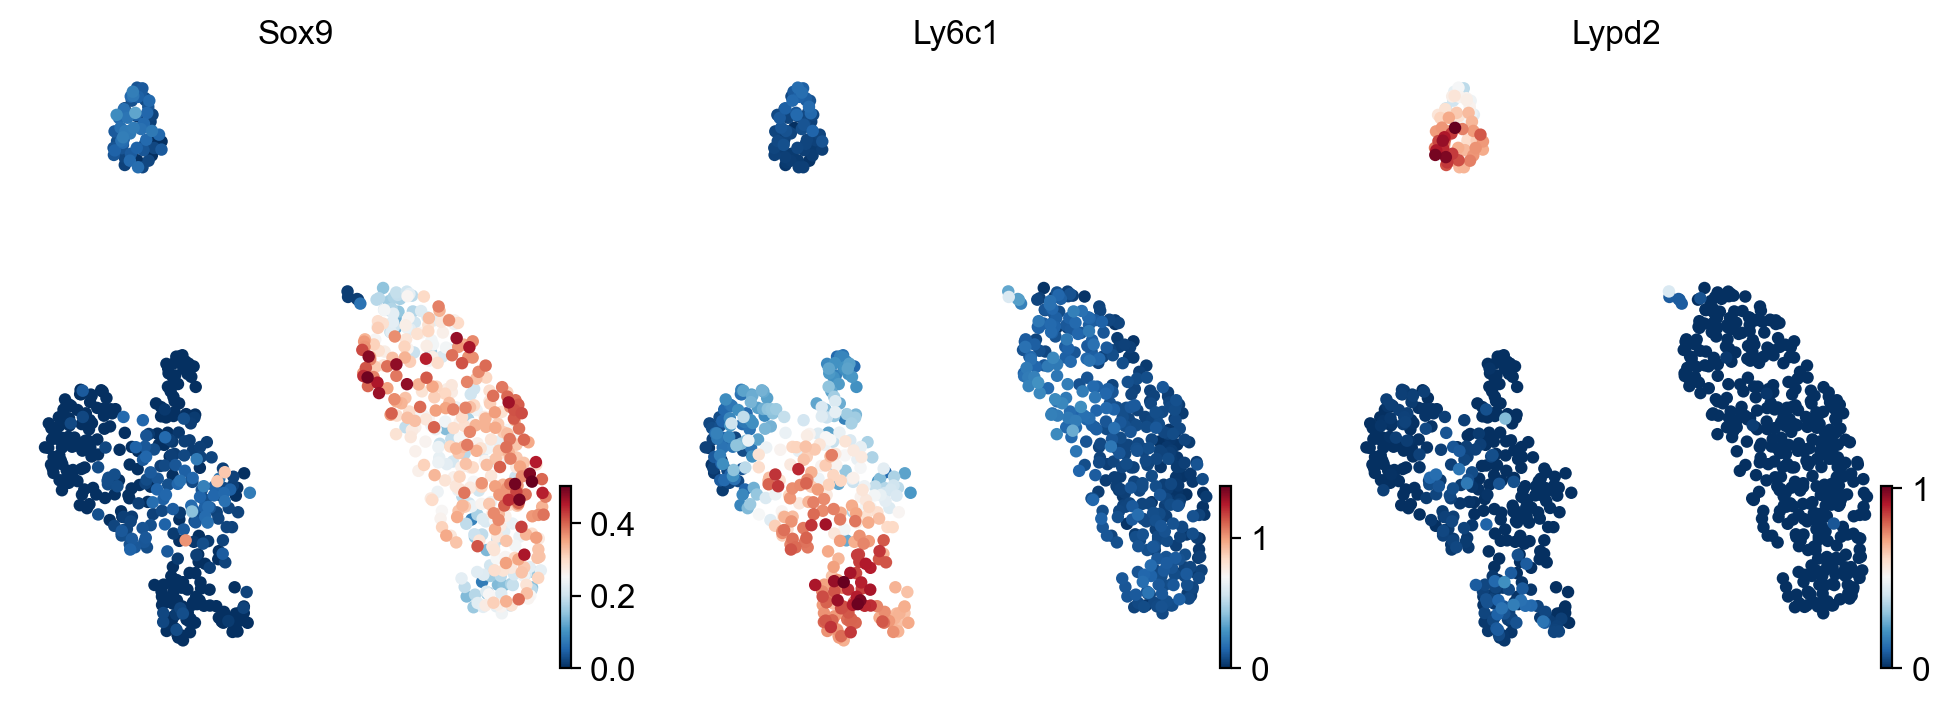

In [32]:
scv.pl.umap(adata,color=["Sox9","Ly6c1","Lypd2"],smooth=True)

In [35]:
adata.obs.leiden=adata.obs.leiden.cat.rename_categories(["Endoneurial","Epineurial","Perineurial"])

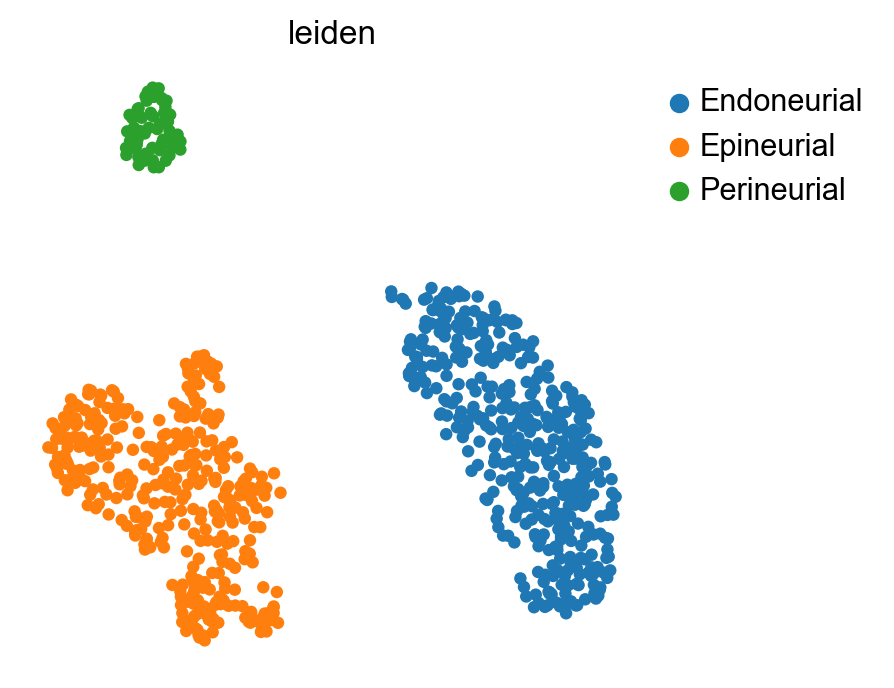

In [37]:
scv.set_figure_params(figsize=(4,4))
scv.pl.umap(adata,color="leiden")

In [38]:
adata.write("adata_processed_mes.h5ad")